In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:99%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

<font color = 'red' size='5'> ch01 영상처리 개요</font>
# 1절 이미지 읽기/쓰기

- pip install opencv-python : 파이썬용 openCV 설치
- pip install opencv-contrib-python : 추가설치
- openCV는 numpy 패키지 필수 설치

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(577, 700, 3) (577, 700, 3)


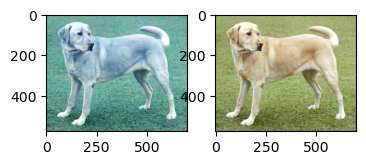

In [6]:
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_bgr.shape, image_rgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_bgr)
axes[1].imshow(image_rgb)
plt.show()

In [7]:
# 넘파이 배열을 이미지 파일로 저장(폴더가 없으면 False, 결과가 True 여야 저장 완료)
cv2.imwrite('data/openCV/bgr.jpg', image_bgr) # cv2가
cv2.imwrite('data/openCV/rgb.jpg', image_rgb)

True

(577, 700) (577, 700, 3)


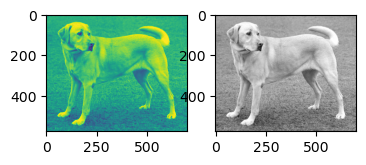

In [11]:
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_grgb = cv2.cvtColor(image_gray,cv2.COLOR_GRAY2RGB) # gray=>rgb
print(image_gray.shape,image_grgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_gray)
axes[1].imshow(image_grgb)
plt.show()

In [12]:
cv2.imwrite('data/openCV/gray.jpg',image_gray)
cv2.imwrite('data/openCV/grgb.jpg',image_grgb)

True

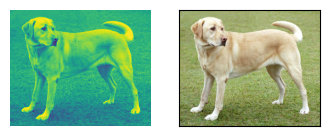

In [30]:
# bgr포맷 이미지의 b,g,r 채널값을 조정해서 rgb 포맷으로 변경
image_bgr = cv2.imread('data/sample.jpg',cv2.IMREAD_ANYCOLOR)
b, g,r = cv2.split(image_bgr)
image_rgb = cv2.merge([r,g,b])
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_gray)
axes[0].axis('off') #  축생략
axes[1].imshow(image_rgb)
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()


# 2절 도형그리기

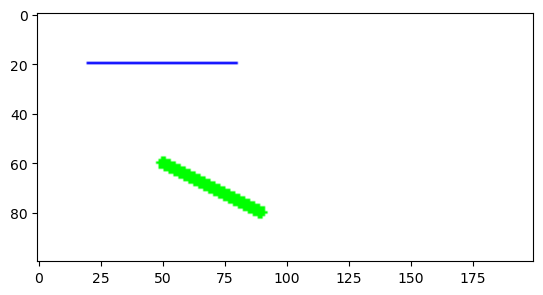

In [45]:
# 선그리기
img = np.full((100,200,3), # 100행 200열 ,3배열
             255, # 배열안에 채울 값
             dtype = np.uint8)#  배열안의 값의 타입이 부호가 없는 정수(unsigned int 8 bit)
cv2.line(img, # img 위에 line을 추가
         (20,20),# 선시작점(x,y)
         (80,20), # 선 끝점(x,y)
         (255,0,0), # 선 색상 cv2에서는 BGR
         1
        )
cv2.line(img,(50,60),(90,80),(0,255,0),3)
#cv2.imwrite('data/openCV/line.png',img)
# cv2.imshow('title',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

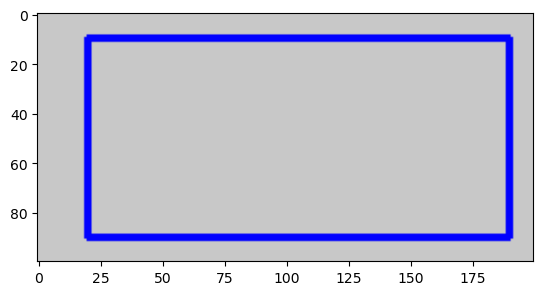

In [51]:
# 사각형 그리기
img = np.full((100,200,3),200, dtype=np.uint8)
cv2.rectangle(img,(20,10),# 사각형 왼쪽윈부분 좌표
             (190,90), # 사각형 오른쪽 아랫부분좌표
             (255,0,0),# 사각형 색상 BGR  포맷
              2 # 두께
             )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

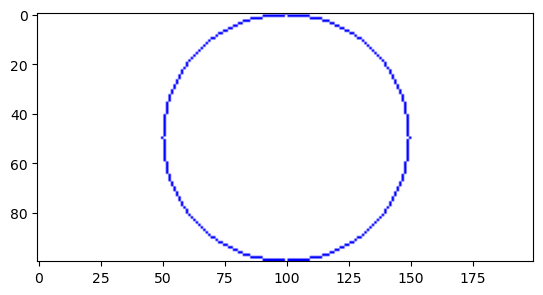

In [53]:
# 원그리기
img = np.full((100,200,3),255,dtype=np.uint8)
cv2.circle(img,
           (100,50),# 원 중심점(x,y)
           50, # 반지름
           (255,0,0), # 원색상
           
          )
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

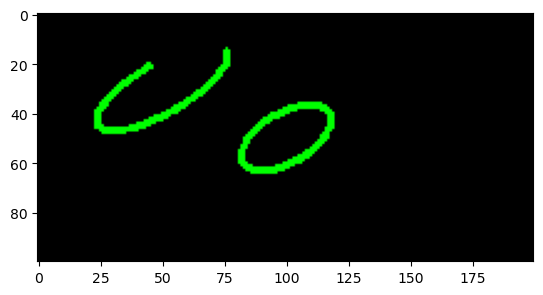

In [60]:
# 호와 타원그리기
img = np.zeros((100,200,3),dtype = np.uint8)
# 타원그리기
cv2.ellipse(img,(100,50), # 타원의 중심 (x,y)
            (20,10),# 두축의 반지름(가로,세로)
            -30, # 반시계 방향 30도 회전
            0,360, # 타원의 시작각도~끝각도
            (0,255,0),
            2       
           )
# 호
cv2.ellipse(img,(50,30), # 타원의 중심 (x,y)
            (30,10),# 두축의 반지름(가로,세로)
            -30, # 반시계 방향 30도 회전
            0,270, # 타원의 시작각도~끝각도
            (0,255,0),
            2       
           )
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

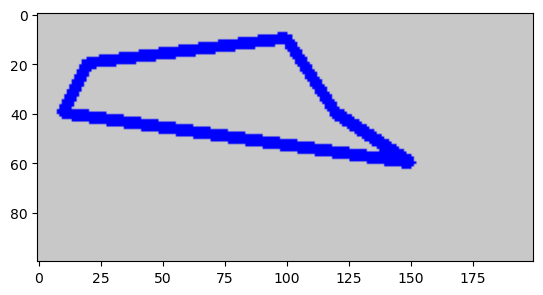

In [74]:
# 다각형
img= np.full((100,200,3),
             200,
             dtype = np.uint8)
points = np.array([[10,40],[20,20],[100,10],[120,40],[150,60]# 꼭짓점 좌표들 (x,y)
                  ])
cv2.polylines(img,[points],True, (255,0,0),3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

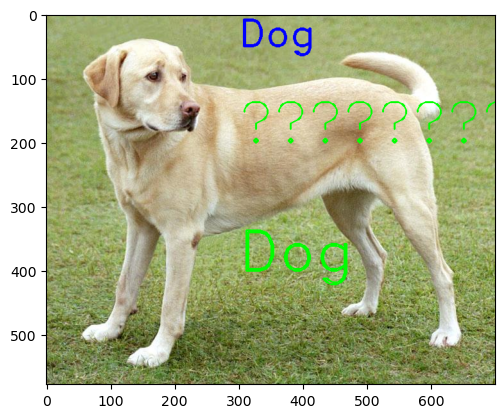

In [122]:
# 문자열 표시하기
img = cv2.imread('data/sample.jpg')
cv2.putText(img,'Dog',# 표시될 문자열
            (300,50),
            cv2.FONT_HERSHEY_DUPLEX,
            2,
            (255,0,0),
            2
           )
cv2.putText(img,'강아지',(300,200),cv2.FONT_ITALIC,3,(0,255,0),2)
cv2.putText(img,'Dog',(300,400),cv2.FONT_HERSHEY_DUPLEX,3,(0,255,0),2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

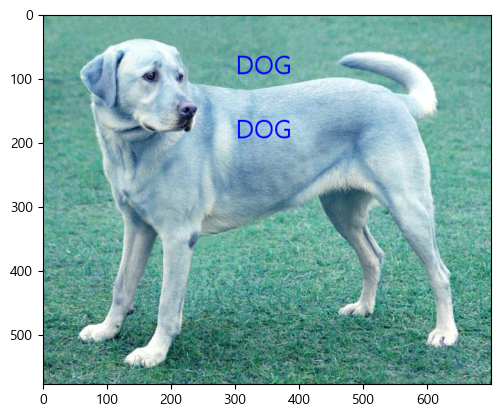

True

In [126]:
from PIL import Image,ImageDraw,ImageFont
img = cv2.imread('data/sample.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_rgb)
draw = ImageDraw.Draw(img_pil) #이미지에 글씨를 draw하는 객체
font = ImageFont.truetype('malgun.ttf',40)
#text추가
draw.text((300,50),'DOG',font=font, fill=(255,0,0))
draw.text((300,150),'DOG',font=font, fill=(255,0,0))
img = np.array(img_pil)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('data/openCV/sample.jpg',img)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [128]:
img = cv2.imread('data/openCV/lena.jpg',
                #cv2.IMREAD_ANYCOLOR 생략가능
                )
print(img.shape)
print(img[0,0]) # 0행 0열
print(img.size)
print(img.dtype)

(512, 512, 3)
[127 136 226]
786432
uint8


In [129]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
print(height, width)

512 512


In [131]:
# 짝수번째 행을 0으로 처리
for y in range(height):
    for x in range(width):
        if y%2 == 0 :
            img[y, x] =0

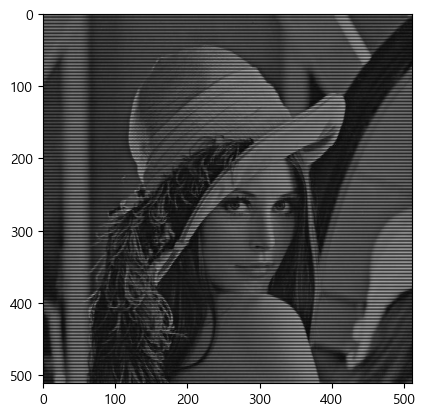

In [133]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()


In [134]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)

# 짝수번째 행을 0으로 처리
img[0::2,...]=0

In [4]:
img = cv2.imread('data/openCV/lena.jpg')
# b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
b, g, r = cv2.split(img)
print('img.shape :', img.shape)
print('b.shape :', b.shape)
print('g.shape :', g.shape)
print('r.shape :', r.shape)
print(np.mean(b), np.mean(g), np.mean(r))

img.shape : (512, 512, 3)
b.shape : (512, 512)
g.shape : (512, 512)
r.shape : (512, 512)
105.54556274414062 98.9676513671875 180.31714248657227


In [5]:
# 이미지의 빨간 채널만 활성화
img[:,:,[0,1]]=0
cv2.imshow('red chanel',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
# 원본, B,G,R채널 활성화
img = cv2.imread('data/openCV/lena.jpg')
cv2.imshow('img',img)

# imgR= cv2.imread('data/openCV/lena.jpg')
imgR = img.copy() #깊은 복사
imgR[:,:,[0,1]] =0
cv2.imshow('red',imgR)

imgG= img.copy()
imgG[:,:,[0,2]]=0
cv2.imshow('green',imgG)

imgB= img.copy()
imgB[:,:,[1,2]]=0
cv2.imshow('blue',imgB)

cv2.waitKey(0)
cv2.destroyAllWindows()

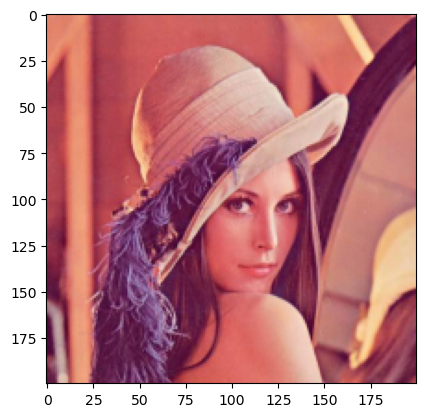

In [11]:
# 특정 pixel로 줄이기
img = cv2.imread('data/openCV/lena.jpg')
height, width, chanel = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.resize(img, dsize=(200,200), interpolation=cv2.INTER_AREA)
plt.imshow(dst)

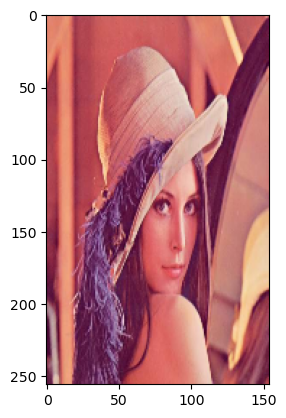

In [12]:
# 특정 비율로 줄이기
dst2 = cv2.resize(img, dsize=(0,0), fx=0.3, # 가로 사이즈 비율
                 fy=0.5, # 세로 사이즈 비율
                 interpolation=cv2.INTER_LINEAR)
plt.imshow(dst2)
plt.show()

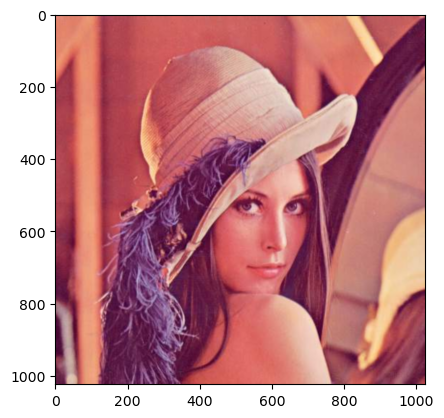

In [16]:
# 2배 확대
dst4= cv2.pyrUp(img)
plt.imshow(dst4)
plt.show()

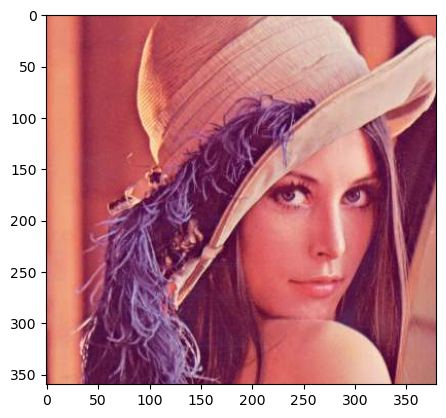

In [17]:
# 이미지 자르기
dst5 = img[90:450, 30:410]
plt.imshow(dst5)
plt.show()

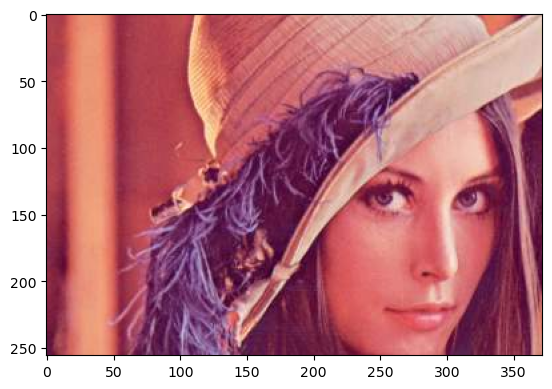

In [15]:
# 이미지의 센터만 추출
dst6 = img[int(height/4):int(height*3/4),int(width/40):int(width*3/4)]
plt.imshow(dst6)
plt.show()


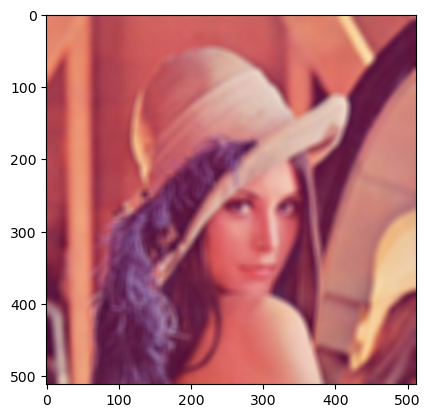

In [18]:
# blur 처리
dst7 = cv2.blur(img,(10,10))
plt.imshow(dst7)
plt.show()

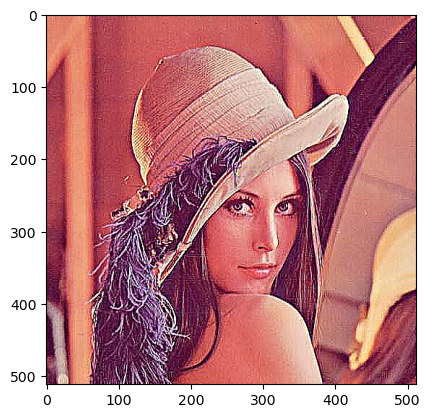

In [19]:
# 이미지를 선명하게 
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

dst8= cv2.filter2D(img,-1, kernel)
plt.imshow(dst8)
plt.show()


In [20]:
# 대칭
dst9 = cv2.flip(img,0)
plt.show(dst9)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
img1 = cv2.imread('data/openCV/ch2_flower1.jpg')
img2 = cv2.imread('data/openCV/ch2_flower2.jpg')
cv2.imshow('flower1',img1)
cv2.imshow('flower2',img2)
# cv2.imshow('np.add',np.add(img1,img2))
cv2.imshow('cv2.add',cv2.add(img1,img2))

cv2.waitKey(0)
cv2.destroyAllWindows()